<style type="text/css">
  body{
  font-size: 11pt;
  font-family: Segoe UI;
}
</style>
![](https://user-images.githubusercontent.com/83436724/166116197-cbe1a8bc-e1df-4cac-ad5e-9f6cd9f0f43c.png)


## Modelos de clasificación aplicados a credit scoring
#### Autor: Carlos Adrián Alarcón [LinkedIn](https://www.linkedin.com/in/carlos-adrian-alarcon-delgado/)

En el presente ejemplo, vamos a desarrollar varios modelos con el fin de predecir si un cliente entrará o no en default (incumplimiento de pago). Para eso, vamos a utilizar un dataset con las siguientes variables:

* Edad: edad del cliente
* Nivel educacional: nivel educacional alcanzado por el cliente
* Años trabajando: años de experiencia laboral del cliente
* Ingresos: monto de ingresos del cliente encriptado
* Deuda comercial: deuda de tipo comercial del cliente
* Deuda crédito: deuda de consumo del cliente
* Otras deudas: deudas no comerciales ni de consumo del cliente
* Ratio Ingresos Deudas: proporción de ingresos sobre deudas totales del cliente
* Default: incumplimiento de cliente en el pago

### Carga de datos

Comenzaremos con cargar el dataset


In [17]:
## Cargar datos

library(readxl)
library(tidyverse)
library(RCurl)
data_inicial = read.csv('https://raw.githubusercontent.com/calarcond/machine_learning_model/main/archivos_trabajo/data_credito.csv')

## Renombrar columnas para mejor entendimiento

colnames(data_inicial)[1] = 'idCliente'
colnames(data_inicial)[4] = 'Años_Trabajando'

data_inicial$Default = as.factor(data_inicial$Default)


### Análisis exploratorio

A partir del dataset anterior, realizaremos el análisis exploratorio del dataset


In [18]:
summary(data_inicial)
columnas = ncol(data_inicial)
filas = nrow(data_inicial)
print(paste('El dataset tiene',columnas,'columnas y',filas, 'filas'))


   idCliente          Edad       Nivel_Educacional  Años_Trabajando 
 Min.   :    1   Min.   :18.00   Length:10000       Min.   : 0.000  
 1st Qu.: 2501   1st Qu.:24.00   Class :character   1st Qu.: 0.000  
 Median : 5000   Median :31.00   Mode  :character   Median : 4.000  
 Mean   : 5000   Mean   :34.18                      Mean   : 6.962  
 3rd Qu.: 7500   3rd Qu.:42.00                      3rd Qu.:10.000  
 Max.   :10000   Max.   :79.00                      Max.   :63.000  
    Ingresos       Deuda_Comercial  Deuda_Credito     Otras_Deudas   
 Min.   :  12.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:  27.00   1st Qu.: 4.800   1st Qu.: 0.420   1st Qu.: 1.110  
 Median :  40.00   Median : 8.500   Median : 1.000   Median : 2.220  
 Mean   :  59.69   Mean   : 9.955   Mean   : 1.945   Mean   : 3.865  
 3rd Qu.:  64.00   3rd Qu.:13.600   3rd Qu.: 2.210   3rd Qu.: 4.590  
 Max.   :1079.00   Max.   :40.700   Max.   :35.970   Max.   :63.470  
 Ratio_Ingresos_Deudas Defa

[1] "El dataset tiene 10 columnas y 10000 filas"


Haremos, a continuación, un análisis gráfico de las variables



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



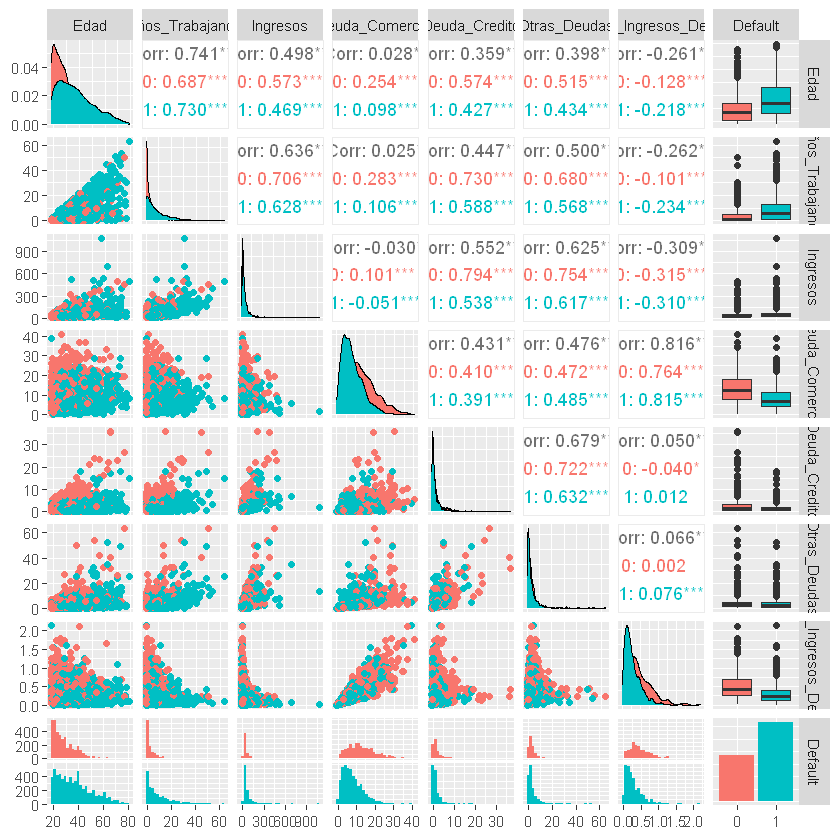

In [19]:
library(ggplot2)
library(GGally)
ggpairs(data_inicial[,c(2,4,5,6,7,8,9,10)], aes(color = Default))


A continuación, revisaremos si es que la variable objetivo está balanceada




   0    1 
3664 6336 

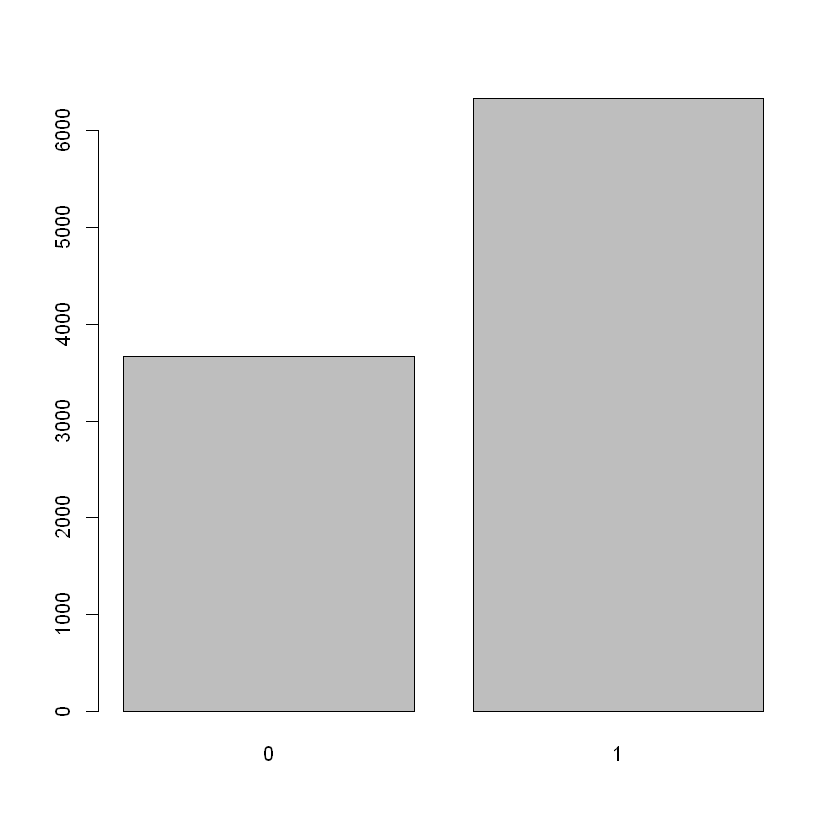

In [20]:
table(data_inicial$Default)
plot(data_inicial$Default) 


### DataPrep

Realizaremos la transformación de la variables categóricas haciendo uso de la técnica One Hot Encoding


In [21]:
library(caret)

dummy_vars = dummyVars('~.', data = data_inicial[,c(1:9)])
data_modelo = data.frame(predict(dummy_vars, newdata = data_inicial))
data_modelo$Default = data_inicial$Default
data_modelo = data_modelo[,c(2,3,4,5,6,7,8,9,10,11,12,13,14)]
summary(data_modelo)


      Edad       Nivel_EducacionalBas Nivel_EducacionalMed
 Min.   :18.00   Min.   :0.0000       Min.   :0.0000      
 1st Qu.:24.00   1st Qu.:0.0000       1st Qu.:0.0000      
 Median :31.00   Median :0.0000       Median :0.0000      
 Mean   :34.18   Mean   :0.1631       Mean   :0.3517      
 3rd Qu.:42.00   3rd Qu.:0.0000       3rd Qu.:1.0000      
 Max.   :79.00   Max.   :1.0000       Max.   :1.0000      
 Nivel_EducacionalPosg Nivel_EducacionalSupCom Nivel_EducacionalSupInc
 Min.   :0.0000        Min.   :0.0000          Min.   :0.0000         
 1st Qu.:0.0000        1st Qu.:0.0000          1st Qu.:0.0000         
 Median :0.0000        Median :0.0000          Median :0.0000         
 Mean   :0.0563        Mean   :0.2072          Mean   :0.2217         
 3rd Qu.:0.0000        3rd Qu.:0.0000          3rd Qu.:0.0000         
 Max.   :1.0000        Max.   :1.0000          Max.   :1.0000         
 Años_Trabajando     Ingresos       Deuda_Comercial  Deuda_Credito   
 Min.   : 0.000   Mi

Con todas las variables, procederemos a hacer el split entre los sets de train y de test. En este caso, utilizaremos una proporción 70% vs. 30%



In [22]:
library(dplyr)
split = sample(c(rep(0,0.7*nrow(data_modelo)),rep(1,0.3*nrow(data_modelo))))
data_modelo$split = split
train = data_modelo[split == 0,]
train = subset(train, select = -c(14))
test = data_modelo[split == 1,]
test = subset(test, select = -c(14))
train = train %>% mutate(DefaultObj = case_when(Default == '1' ~ 1, TRUE ~ 0))
test = test %>% mutate(DefaultObj = case_when(Default == '1' ~ 1, TRUE ~ 0))


### Entrenamiento de modelos

Ahora, entrenaremos diversos modelos. Por el momento, no entraremos al detalle técnico de cada uno, solamente nos enfocaremos en la implementación básica del modelo.

#### XGBoost


In [23]:
library(xgboost)
library(e1071)
x_train = data.matrix(subset(train, select = -c(13,14)))
y_train = train$DefaultObj
x_test = data.matrix(subset(test, select = -c(13,14)))
y_test = test$DefaultObj

xgb_train = xgb.DMatrix(data = x_train, label = y_train)
xgb_test = xgb.DMatrix(data = x_test, label = y_test)
modelo_xgb = xgboost(data = xgb_train, nrounds = 50, objective = 'binary:logistic')
summary(modelo_xgb)
pred_test = predict(modelo_xgb, xgb_test)


[1]	train-logloss:0.574276 
[2]	train-logloss:0.501044 
[3]	train-logloss:0.449728 
[4]	train-logloss:0.413099 
[5]	train-logloss:0.384582 
[6]	train-logloss:0.360990 
[7]	train-logloss:0.343130 
[8]	train-logloss:0.332280 
[9]	train-logloss:0.318254 
[10]	train-logloss:0.303186 
[11]	train-logloss:0.293923 
[12]	train-logloss:0.288037 
[13]	train-logloss:0.279779 
[14]	train-logloss:0.271979 
[15]	train-logloss:0.261461 
[16]	train-logloss:0.256929 
[17]	train-logloss:0.247684 
[18]	train-logloss:0.237712 
[19]	train-logloss:0.232669 
[20]	train-logloss:0.229588 
[21]	train-logloss:0.222882 
[22]	train-logloss:0.210632 
[23]	train-logloss:0.208978 
[24]	train-logloss:0.199709 
[25]	train-logloss:0.191128 
[26]	train-logloss:0.189362 
[27]	train-logloss:0.180060 
[28]	train-logloss:0.171554 
[29]	train-logloss:0.165908 
[30]	train-logloss:0.159278 
[31]	train-logloss:0.157700 
[32]	train-logloss:0.153243 
[33]	train-logloss:0.149385 
[34]	train-logloss:0.144275 
[35]	train-logloss:0.13

               Length Class              Mode       
handle              1 xgb.Booster.handle externalptr
raw            151801 -none-             raw        
niter               1 -none-             numeric    
evaluation_log      2 data.table         list       
call               14 -none-             call       
params              2 -none-             list       
callbacks           2 -none-             list       
feature_names      12 -none-             character  
nfeatures           1 -none-             numeric    

In [24]:
### Probabilidades
y_pred_xgb = as.numeric(pred_test > 0.5)
cm_xgb = table(y_test,y_pred_xgb)
confusionMatrix(cm_xgb)


Confusion Matrix and Statistics

      y_pred_xgb
y_test    0    1
     0 1087   23
     1    5 1885
                                          
               Accuracy : 0.9907          
                 95% CI : (0.9865, 0.9938)
    No Information Rate : 0.636           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9799          
                                          
 Mcnemar's Test P-Value : 0.001315        
                                          
            Sensitivity : 0.9954          
            Specificity : 0.9879          
         Pos Pred Value : 0.9793          
         Neg Pred Value : 0.9974          
             Prevalence : 0.3640          
         Detection Rate : 0.3623          
   Detection Prevalence : 0.3700          
      Balanced Accuracy : 0.9917          
                                          
       'Positive' Class : 0               
                                       

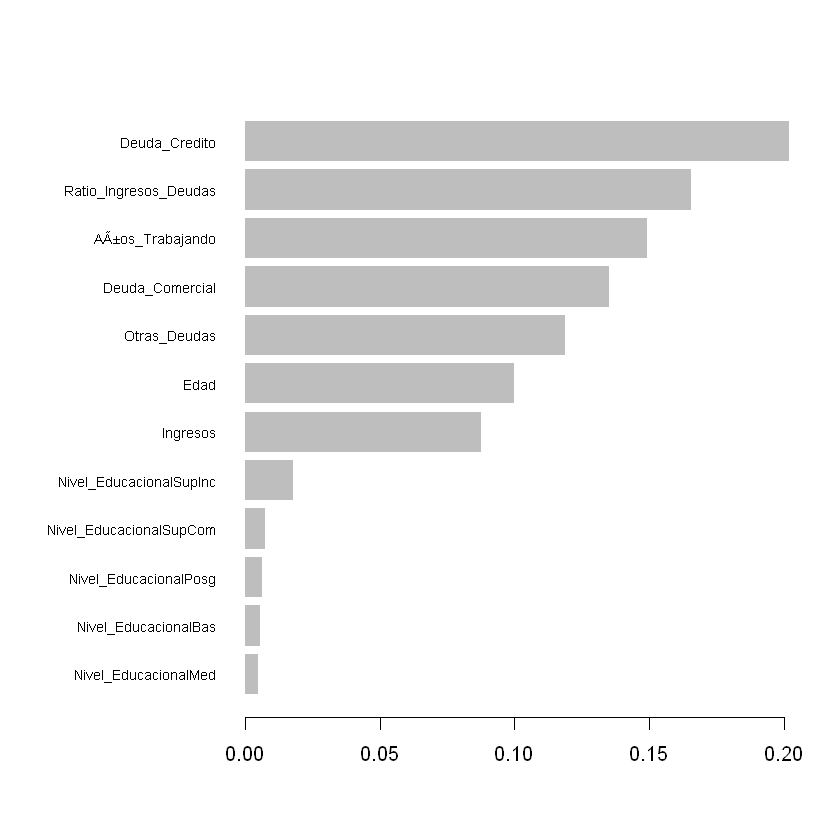

In [25]:
importance_matrix = xgb.importance(model = modelo_xgb)
xgb.plot.importance(importance_matrix = importance_matrix)


Ahora, generaremos la curva ROC



Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9993

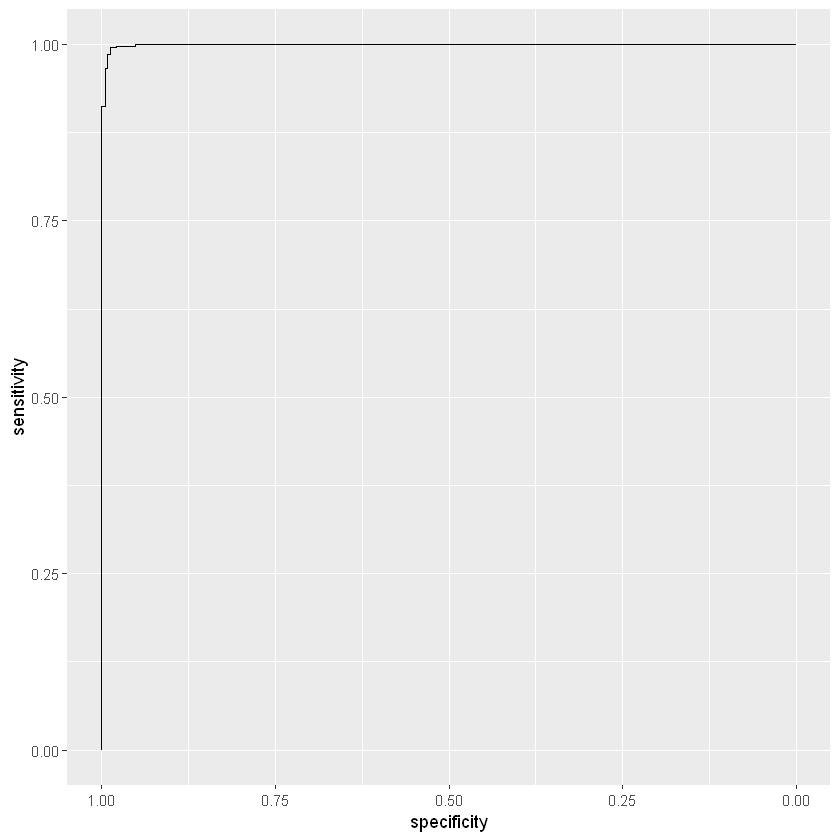

In [26]:
library(ROCR)
library(pROC)

roc_xgb = roc(y_test, pred_test)
auc(roc_xgb)
ggroc(roc_xgb)


#### Random Forest



Confusion Matrix and Statistics

      y_pred_rf
y_test    0    1
     0 1108    2
     1    0 1890
                                          
               Accuracy : 0.9993          
                 95% CI : (0.9976, 0.9999)
    No Information Rate : 0.6307          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9986          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9989          
         Pos Pred Value : 0.9982          
         Neg Pred Value : 1.0000          
             Prevalence : 0.3693          
         Detection Rate : 0.3693          
   Detection Prevalence : 0.3700          
      Balanced Accuracy : 0.9995          
                                          
       'Positive' Class : 0               
                                        

,MeanDecreaseGini
Edad,373.10772
Nivel_EducacionalBas,38.79638
Nivel_EducacionalMed,38.48435
Nivel_EducacionalPosg,22.90965
Nivel_EducacionalSupCom,35.30142
Nivel_EducacionalSupInc,39.64414
Años_Trabajando,429.56055
Ingresos,319.14653
Deuda_Comercial,518.49396
Deuda_Credito,458.17054


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 1

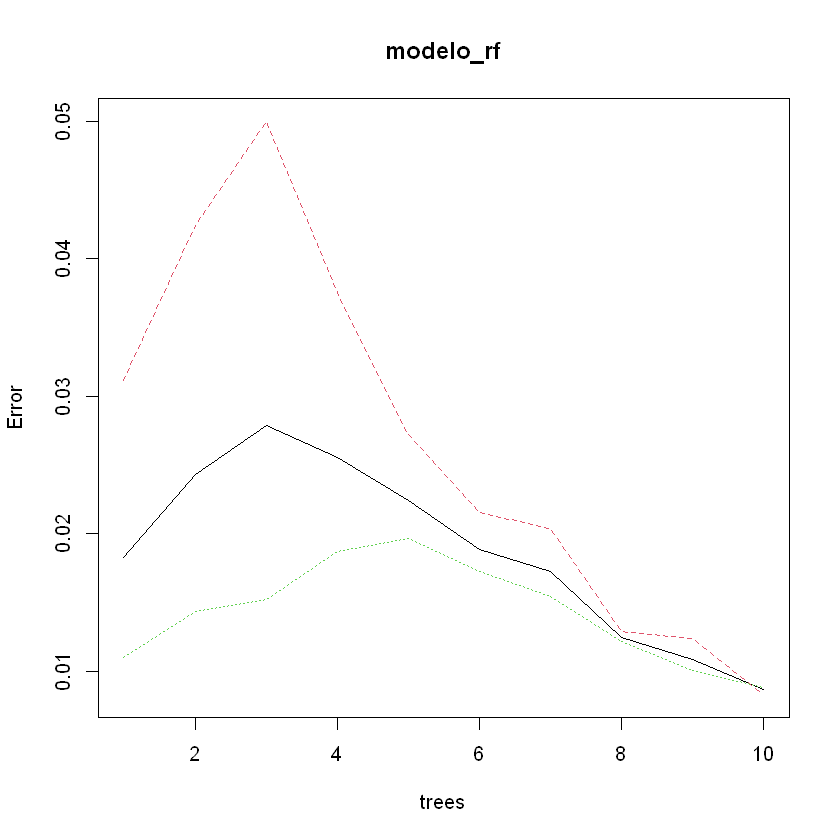

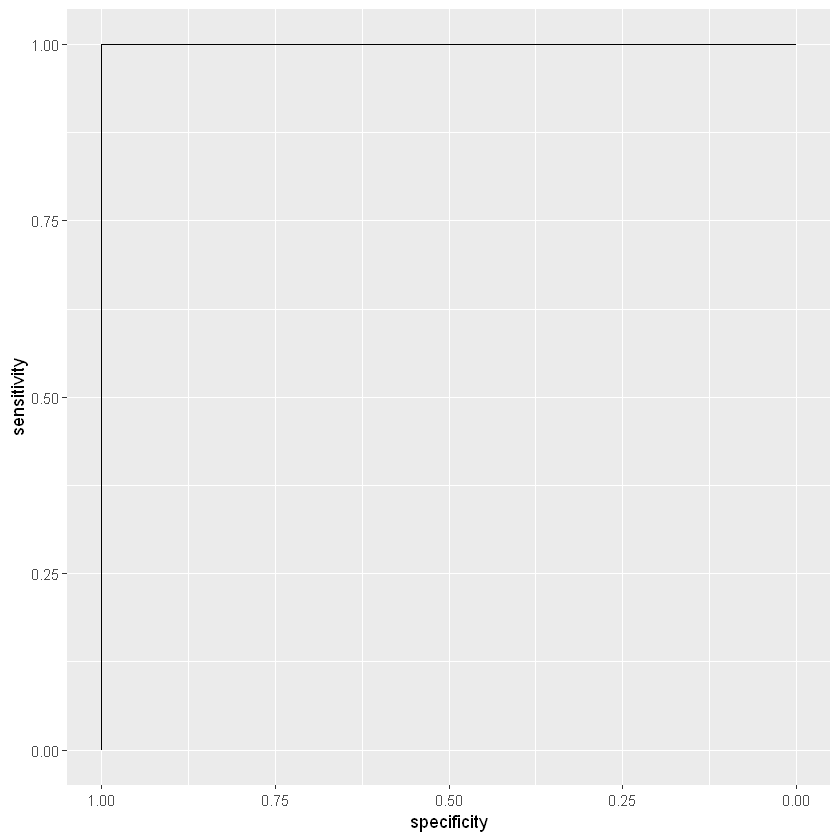

In [27]:
library(randomForest)

train_final = train[,c(1,2,3,4,5,6,7,8,9,10,11,12,13)]
modelo_rf = randomForest( Default~.,
                         data = train_final,
                         ntree = 10)

y_pred_rf = predict(modelo_rf, x_test)
y_pred_prob_rf = predict(modelo_rf, x_test, type = 'prob')
cm_rf = table(y_test,y_pred_rf)
confusionMatrix(cm_rf)
importance(modelo_rf)
plot(modelo_rf)
curva_roc_rf = roc(y_test,y_pred_prob_rf[,2])
auc(curva_roc_rf)
ggroc(curva_roc_rf)


#### Naive Bayes



Confusion Matrix and Statistics

      y_pred_nb
y_test    0    1
     0  585  525
     1  236 1654
                                          
               Accuracy : 0.7463          
                 95% CI : (0.7304, 0.7618)
    No Information Rate : 0.7263          
    P-Value [Acc > NIR] : 0.007093        
                                          
                  Kappa : 0.425           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7125          
            Specificity : 0.7591          
         Pos Pred Value : 0.5270          
         Neg Pred Value : 0.8751          
             Prevalence : 0.2737          
         Detection Rate : 0.1950          
   Detection Prevalence : 0.3700          
      Balanced Accuracy : 0.7358          
                                          
       'Positive' Class : 0               
                                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8094

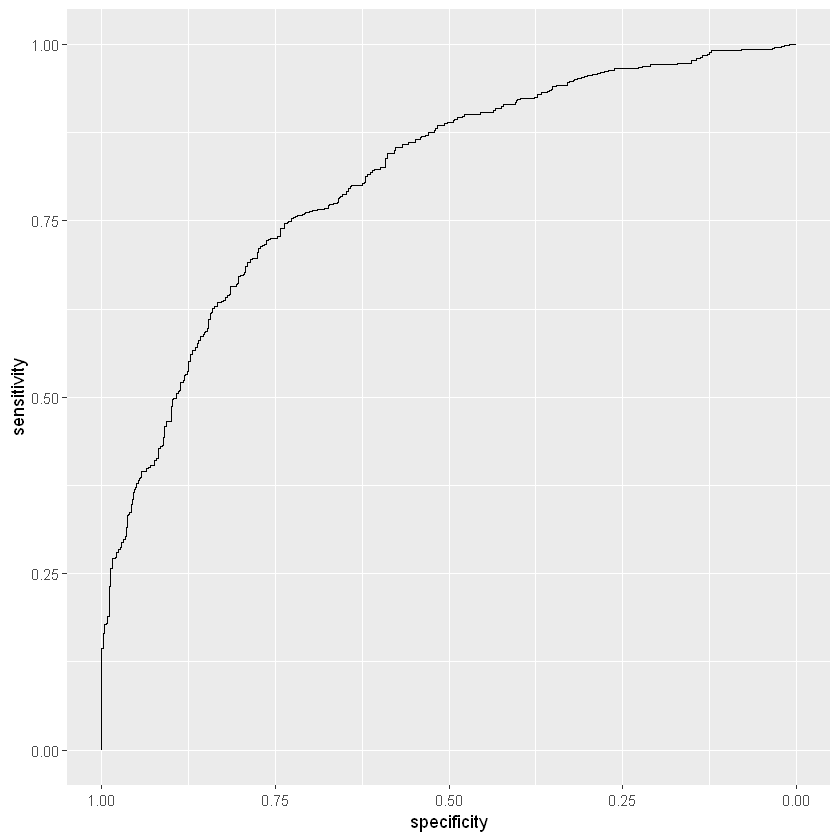

In [28]:
library(e1071)
library(caTools)

modelo_nb = naiveBayes(Default ~.,
                       data = train_final)

y_pred_nb = predict(modelo_nb, x_test)
y_pred_nb_num = as.numeric(y_pred_nb)
y_pred_prob_nb = predict(modelo_nb, x_test, type = 'raw')
prediccion_nb = prediction(y_pred_nb_num,y_test)
cm_nb = table(y_test,y_pred_nb)
confusionMatrix(cm_nb)
roc_nb = roc(y_test,y_pred_prob_nb[,2])
auc(roc_nb)
ggroc(roc_nb)


#### Support Vector Machine
 


Confusion Matrix and Statistics

      y_pred_svm
y_test    0    1
     0  590  520
     1  137 1753
                                          
               Accuracy : 0.781           
                 95% CI : (0.7658, 0.7957)
    No Information Rate : 0.7577          
    P-Value [Acc > NIR] : 0.001389        
                                          
                  Kappa : 0.4942          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8116          
            Specificity : 0.7712          
         Pos Pred Value : 0.5315          
         Neg Pred Value : 0.9275          
             Prevalence : 0.2423          
         Detection Rate : 0.1967          
   Detection Prevalence : 0.3700          
      Balanced Accuracy : 0.7914          
                                          
       'Positive' Class : 0               
                                       

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8585

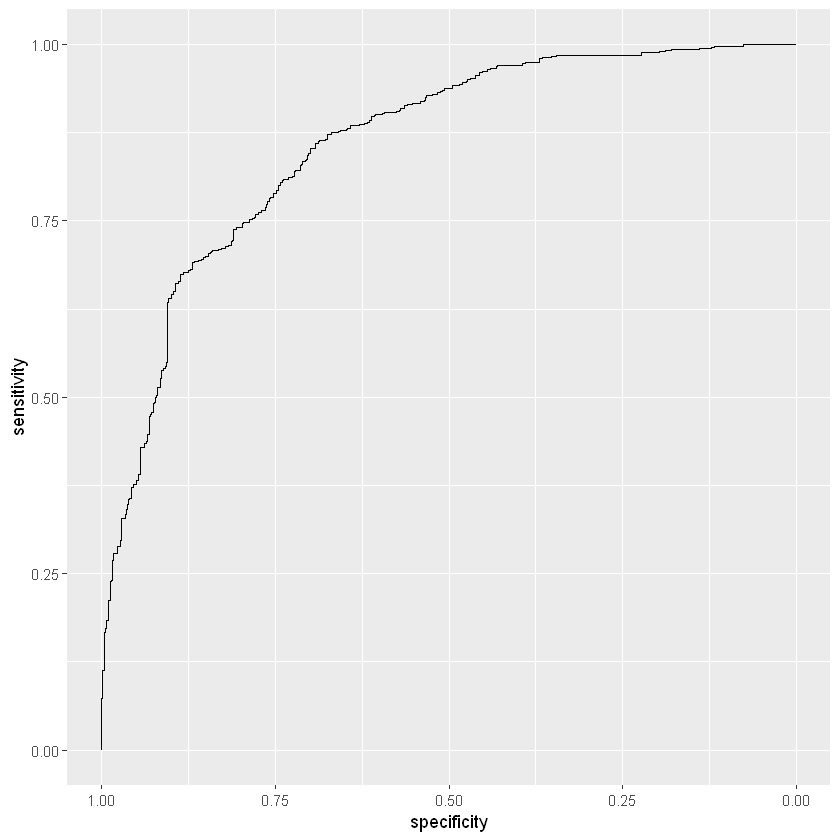

In [29]:
modelo_svm = svm(Default ~.,
                 data = train_final,
                 type = 'C-classification',
                 kernel = 'radial',
                 probability = TRUE)

y_pred_svm = predict(modelo_svm, x_test)
y_pred_prob_svm = predict(modelo_svm, x_test, probability = TRUE)
y_pred_prob_svm_prob = attr(y_pred_prob_svm,'probabilities')
cm_svm = table(y_test, y_pred_svm)
confusionMatrix(cm_svm)              
roc_svm = roc(y_test, y_pred_prob_svm_prob[,2])
auc(roc_svm)
ggroc(roc_svm)


### Comparación final



Area under the curve: 0.8585
Area under the curve: 0.8094
Area under the curve: 1
Area under the curve: 0.9993


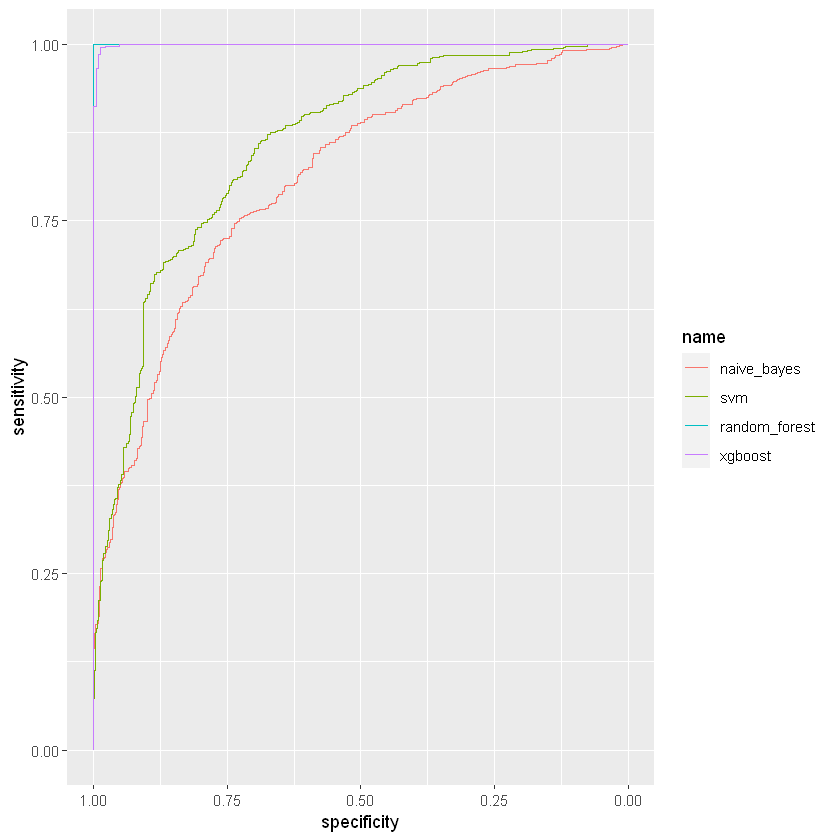

In [30]:


print(auc(roc_svm))
print(auc(roc_nb))
print(auc(curva_roc_rf))
print(auc(roc_xgb))


ggroc(list(naive_bayes = roc_nb, svm = roc_svm, random_forest = curva_roc_rf, xgboost = roc_xgb))

### Conclusiones

En este notebook hemos visto la aplicación bastante genérica de 04 algoritmos de machine learning para resolver un problema de clasificación. En general, esto es una introducción a la aplicación de algoritmos debido a que todavía está pendiente la calibración de hiperparámetros, entre otras técnicas.
